### Load data

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
os.listdir("../Data")

['datos edgar.xlsx', 'prueba.csv', 'prueba2.csv']

### Load data

In [3]:
path_to_file = Path().resolve().parent / "Data" / "datos edgar.xlsx"

In [4]:
data = pd.read_excel(path_to_file, header=1).dropna(how="all").drop(columns="espTa2O5")

In [5]:
data

espAl2O3       espSiO2     freq (Hz)     R (1)   T (1)    A (1)  \
1      1.000000e-08  2.000000e-08  3.210000e+14   0.38981  98.680  0.93037   
2      1.000000e-08  2.000000e-08  3.140000e+14   0.44006  98.682  0.87804   
3      1.000000e-08  2.000000e-08  3.070000e+14   0.60150  98.572  0.82621   
4      1.000000e-08  2.000000e-08  3.000000e+14   0.87280  98.352  0.77516   
5      1.000000e-08  3.000000e-08  2.997900e+14   0.44376  98.776  0.77988   
...             ...           ...           ...       ...     ...      ...   
9996   1.000000e-07  1.000000e-07  3.280000e+14  13.18900  85.989  0.82217   
9997   1.000000e-07  1.000000e-07  3.210000e+14  13.82300  85.403  0.77422   
9998   1.000000e-07  1.000000e-07  3.140000e+14  14.30500  84.965  0.73037   
9999   1.000000e-07  1.000000e-07  3.070000e+14  14.62500  84.685  0.69017   
10000  1.000000e-07  1.000000e-07  3.000000e+14  14.77700  84.570  0.65335   

           Lambda  
1       934.57944  
2       955.41401  
3       977.19870  
4      1000.00000  
5      1000.70049  
...           ...  
9996    914.63415  
9997    934.57944  
9998    955.41401  
9999    977.19870  
10000  1000.00000  

[10000 rows x 7 columns]

In [6]:
data_by_group = ( 
    data
    # add group column
    .assign(
        grupo = lambda k: k
            .groupby(["espAl2O3", "espSiO2"])
            .ngroup()
    )
)

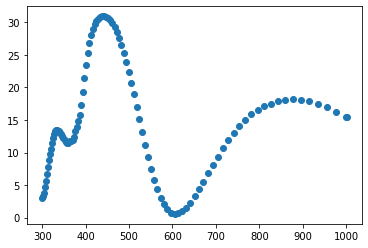

In [7]:
dn = data_by_group.query("grupo == 93")
plt.scatter(dn.Lambda, dn['R (1)'])

In [121]:
# plot with plotly each group shiffted by 0.1 in a 3D plot

fig = px.scatter_3d(
    data_by_group,
    x='Lambda',
    y='R (1)',
    z='grupo',
    color='grupo',
    opacity=0.9,
    size='grupo',
    size_max=10,
    symbol='grupo',
    title='3D Scatter Plot'
)

fig.show()

### 1 Lambda

In [16]:
nn = data_by_group.query("Lambda == 596.42147")

In [18]:
# create a 2d scatter plot with plotly where nn.Lambda is the x axis and nn['R (1)'] is the y axis
# and the color is the group

fig = px.scatter(
    nn,
    x='Lambda',
    y='R (1)',
    color='grupo',
    opacity=0.9,
    size='grupo',
    size_max=10,
    symbol='grupo',
    title='2D Scatter Plot'
)

fig.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(nn['espSiO2'], nn['R (1)'], c=nn.grupo, label=nn.grupo)
plt.legend()
plt.xlabel('espSiO2')
plt.ylabel('R (1)');

In [155]:
### create a 3D plot with plotly, that shows the R(1) vs espSiO2 vs espAl2O3

fig = px.scatter_3d(
    data_by_group,
    x='espSiO2',
    y='espAl2O3',
    z='R (1)',
    color='R (1)',
    opacity=0.9,
    size='R (1)',
    size_max=10,
    symbol='R (1)',
    title='3D Scatter Plot'
)

fig.show()